In [1]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
%config Completer.use_jedi = False
import pandas as pd
import numpy as np
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Config option `use_jedi` not recognized by `IPCompleter`.
  """Entry point for launching an IPython kernel.


In [3]:
df=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/FlipRobo/proj1/Data file.csv')

In [4]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,7/20/2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,8/10/2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,8/19/2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,6/6/2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,6/22/2016


In [5]:
df=df.drop(['pcircle','Unnamed: 0'],axis=1)# It's same as Index need to Drop.
df.head(2)

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,0,21408I70789,272.0,3055.05,3065.15,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.0,29.0,7/20/2016
1,1,76462I70374,712.0,12122.00,12124.75,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.0,0.0,8/10/2016


In [6]:
# pdate is object datatype need to convert in to int.
df.pdate=pd.to_datetime(df['pdate'])
df['p_day']=df['pdate'].dt.day
df['p_month']=df['pdate'].dt.month
df['p_year']=df['pdate'].dt.year

In [7]:
df=df.drop(['pdate'],axis=1)

In [8]:
#df['msisdn']=df['msisdn'].astype(int)
len(df['msisdn'].unique())

186243

In [9]:
df.shape

(209593, 37)

In [10]:
df=df.drop(['msisdn'],axis=1) #msisdn is unique idenctification NO need to drop it.

In [11]:
df.info()
# All Dtype is int64 and float64 and no any missing value is present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   aon                   209593 non-null  float64
 2   daily_decr30          209593 non-null  float64
 3   daily_decr90          209593 non-null  float64
 4   rental30              209593 non-null  float64
 5   rental90              209593 non-null  float64
 6   last_rech_date_ma     209593 non-null  float64
 7   last_rech_date_da     209593 non-null  float64
 8   last_rech_amt_ma      209593 non-null  int64  
 9   cnt_ma_rech30         209593 non-null  int64  
 10  fr_ma_rech30          209593 non-null  float64
 11  sumamnt_ma_rech30     209593 non-null  float64
 12  medianamnt_ma_rech30  209593 non-null  float64
 13  medianmarechprebal30  209593 non-null  float64
 14  cnt_ma_rech90         209593 non-null  int64  
 15  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


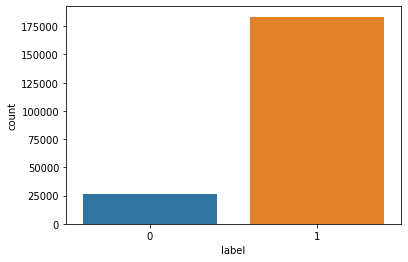

In [12]:
# need to check output level is balance or unbalenced using count plot.
sns.countplot(df['label'])
# Data set imbalenced

In [13]:
df.corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,p_day,p_month,p_year
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,0.001330,0.202828,0.141490,-0.004829,0.236392,0.084385,0.205793,0.120855,0.039300,0.003827,-0.000027,0.002999,-0.005418,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183,0.006825,0.154949,NaN
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,-0.001163,0.000707,0.004306,0.003930,-0.002725,0.004401,0.001011,0.004909,-0.000859,0.001564,0.000892,0.001121,0.005395,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203,0.000662,-0.001863,NaN
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,-0.000577,0.636536,0.295356,-0.001153,0.587338,-0.078299,0.762981,0.257847,0.037495,0.000700,-0.001499,0.038814,0.020673,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175,0.006477,0.518664,NaN
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,-0.000343,0.603886,0.282960,-0.000746,0.593069,-0.079530,0.768817,0.250518,0.036382,0.000661,-0.001570,0.031155,0.016437,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800,-0.021508,0.539410,NaN
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,-0.001219,0.272649,0.129853,-0.001415,0.312118,-0.033530,0.342306,0.110356,0.027170,-0.001105,-0.002558,0.072255,0.046761,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147,0.036537,0.365699,NaN
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,-0.000503,0.259709,0.120242,-0.001237,0.345293,-0.036524,0.360601,0.103151,0.029547,-0.000548,-0.002345,0.056282,0.036886,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501,0.008941,0.429407,NaN
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,-0.001629,0.002105,-0.001358,0.004071,0.004263,0.001414,0.002243,-0.000726,-0.001086,-0.003467,-0.003626,-0.003538,-0.002395,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583,0.000560,-0.001207,NaN
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,0.001158,0.000046,0.001037,0.002849,0.001272,0.000798,-0.000414,0.000219,0.004158,-0.003628,-0.000074,-0.001859,-0.000203,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417,0.000631,-0.001800,NaN
last_rech_amt_ma,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,0.002876,0.440821,0.794646,-0.002342,0.016707,0.106267,0.418735,0.818734,0.124646,-0.001837,-0.003230,0.014779,0.016042,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260,0.028883,0.096919,NaN
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,0.001669,0.656986,-0.011792,0.000082,0.886433,-0.152759,0.584060,-0.051347,0.013463,0.002306,-0.002732,0.011981,0.006989,0.765802,0.752296,0.000109,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362,0.068643,0.156148,NaN


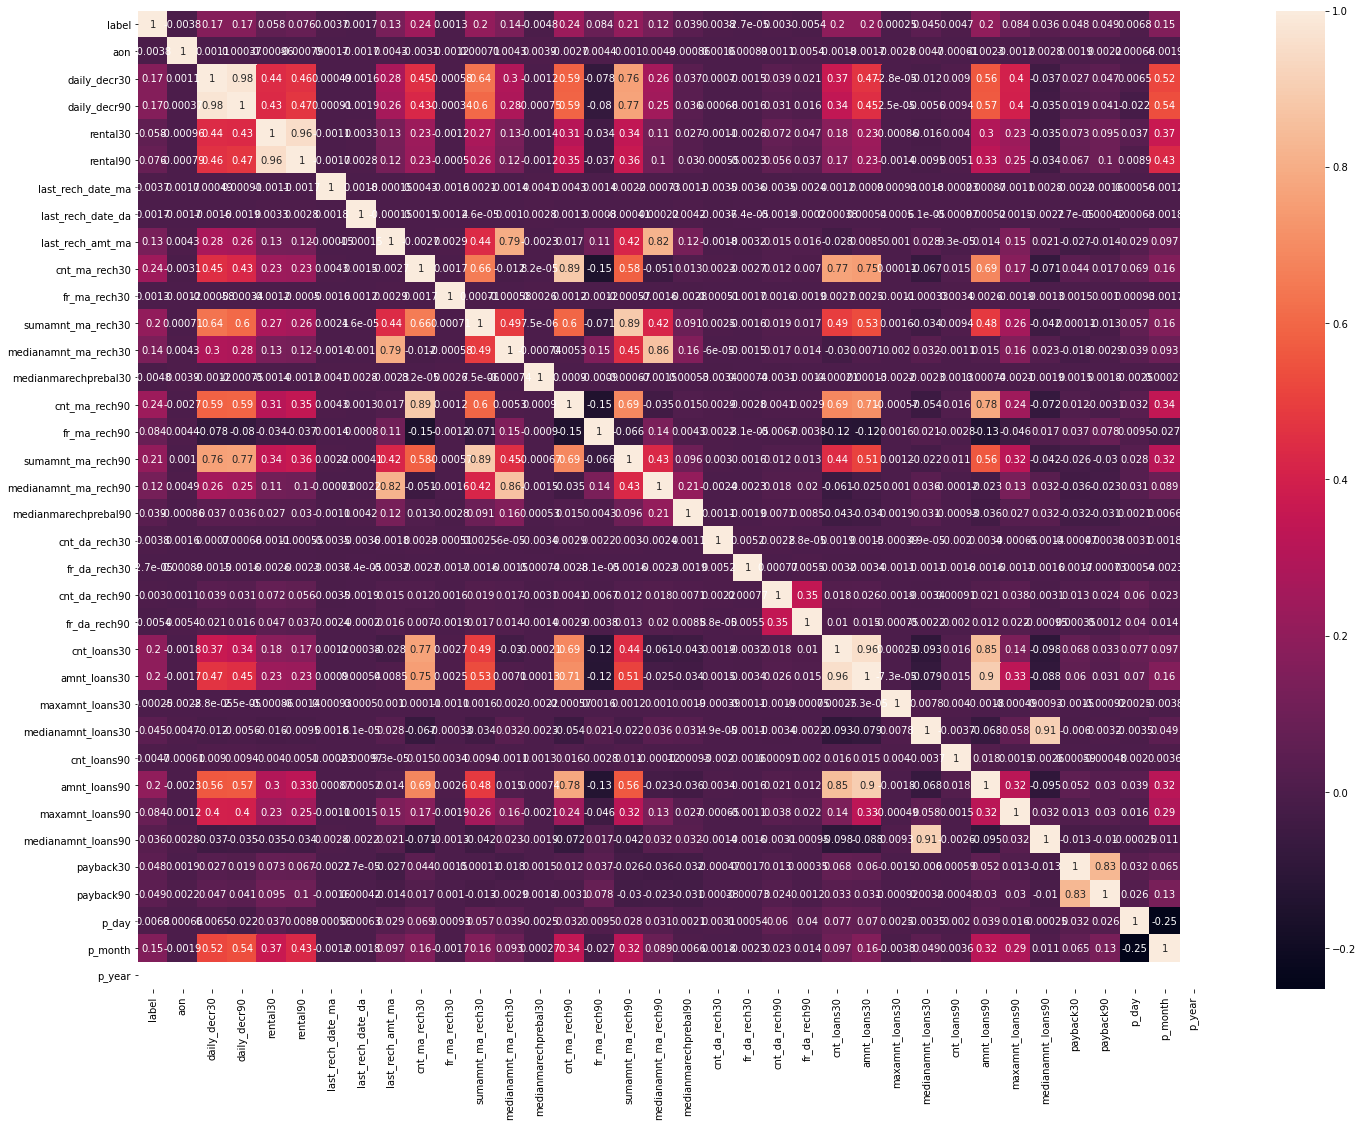

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(24,18))
sns.heatmap(df.corr(),annot=True)

In [15]:
# heatmap is not clearly visible hence finding the feature which one is lees correleted 
df.corr()[abs(df.corr())<0.05]

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,p_day,p_month,p_year
label,NaN,-0.003785,NaN,NaN,NaN,NaN,0.003728,0.001711,NaN,NaN,0.001330,NaN,NaN,-0.004829,NaN,NaN,NaN,NaN,0.039300,0.003827,-0.000027,0.002999,-0.005418,NaN,NaN,0.000248,0.044589,0.004733,NaN,NaN,0.035747,0.048336,0.049183,0.006825,NaN,NaN
aon,-0.003785,NaN,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,-0.001163,0.000707,0.004306,0.003930,-0.002725,0.004401,0.001011,0.004909,-0.000859,0.001564,0.000892,0.001121,0.005395,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203,0.000662,-0.001863,NaN
daily_decr30,NaN,0.001104,NaN,NaN,NaN,NaN,0.000487,-0.001636,NaN,NaN,-0.000577,NaN,NaN,-0.001153,NaN,NaN,NaN,NaN,0.037495,0.000700,-0.001499,0.038814,0.020673,NaN,NaN,-0.000028,-0.011610,0.008962,NaN,NaN,-0.037305,0.026915,0.047175,0.006477,NaN,NaN
daily_decr90,NaN,0.000374,NaN,NaN,NaN,NaN,0.000908,-0.001886,NaN,NaN,-0.000343,NaN,NaN,-0.000746,NaN,NaN,NaN,NaN,0.036382,0.000661,-0.001570,0.031155,0.016437,NaN,NaN,0.000025,-0.005591,0.009446,NaN,NaN,-0.034686,0.019400,0.040800,-0.021508,NaN,NaN
rental30,NaN,-0.000960,NaN,NaN,NaN,NaN,-0.001095,0.003261,NaN,NaN,-0.001219,NaN,NaN,-0.001415,NaN,-0.033530,NaN,NaN,0.027170,-0.001105,-0.002558,NaN,0.046761,NaN,NaN,-0.000864,-0.016482,0.004012,NaN,NaN,-0.035489,NaN,NaN,0.036537,NaN,NaN
rental90,NaN,-0.000790,NaN,NaN,NaN,NaN,-0.001688,0.002794,NaN,NaN,-0.000503,NaN,NaN,-0.001237,NaN,-0.036524,NaN,NaN,0.029547,-0.000548,-0.002345,NaN,0.036886,NaN,NaN,-0.001411,-0.009467,0.005141,NaN,NaN,-0.034122,NaN,NaN,0.008941,NaN,NaN
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,NaN,0.001790,-0.000147,0.004311,-0.001629,0.002105,-0.001358,0.004071,0.004263,0.001414,0.002243,-0.000726,-0.001086,-0.003467,-0.003626,-0.003538,-0.002395,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583,0.000560,-0.001207,NaN
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,NaN,-0.000149,0.001549,0.001158,0.000046,0.001037,0.002849,0.001272,0.000798,-0.000414,0.000219,0.004158,-0.003628,-0.000074,-0.001859,-0.000203,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417,0.000631,-0.001800,NaN
last_rech_amt_ma,NaN,0.004256,NaN,NaN,NaN,NaN,-0.000147,-0.000149,NaN,-0.002662,0.002876,NaN,NaN,-0.002342,0.016707,NaN,NaN,NaN,NaN,-0.001837,-0.003230,0.014779,0.016042,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,NaN,0.021004,-0.027369,-0.014260,0.028883,NaN,NaN
cnt_ma_rech30,NaN,-0.003148,NaN,NaN,NaN,NaN,0.004311,0.001549,-0.002662,NaN,0.001669,NaN,-0.011792,0.000082,NaN,NaN,NaN,NaN,0.013463,0.002306,-0.002732,0.011981,0.006989,NaN,NaN,0.000109,NaN,0.014703,NaN,NaN,NaN,0.043617,0.017362,NaN,NaN,NaN


In [16]:
# heatmap is not clearly visible hence finding the feature which one is high correleted 
df.corr()[abs(df.corr())>0.05]

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,p_day,p_month,p_year
label,1.000000,NaN,0.168298,0.166150,0.058085,0.075521,NaN,NaN,0.131804,0.237331,NaN,0.202828,0.141490,NaN,0.236392,0.084385,0.205793,0.120855,NaN,NaN,NaN,NaN,NaN,0.196283,0.197272,NaN,NaN,NaN,0.199788,0.084144,NaN,NaN,NaN,NaN,0.154949,NaN
aon,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
daily_decr30,0.168298,NaN,1.000000,0.977704,0.442066,0.458977,NaN,NaN,0.275837,0.451385,NaN,0.636536,0.295356,NaN,0.587338,-0.078299,0.762981,0.257847,NaN,NaN,NaN,NaN,NaN,0.366116,0.471492,NaN,NaN,NaN,0.563496,0.400199,NaN,NaN,NaN,NaN,0.518664,NaN
daily_decr90,0.166150,NaN,0.977704,1.000000,0.434685,0.471730,NaN,NaN,0.264131,0.426707,NaN,0.603886,0.282960,NaN,0.593069,-0.079530,0.768817,0.250518,NaN,NaN,NaN,NaN,NaN,0.340387,0.447869,NaN,NaN,NaN,0.567204,0.397251,NaN,NaN,NaN,NaN,0.539410,NaN
rental30,0.058085,NaN,0.442066,0.434685,1.000000,0.955237,NaN,NaN,0.127271,0.233343,NaN,0.272649,0.129853,NaN,0.312118,NaN,0.342306,0.110356,NaN,NaN,NaN,0.072255,NaN,0.180203,0.233453,NaN,NaN,NaN,0.298943,0.234211,NaN,0.072974,0.095147,NaN,0.365699,NaN
rental90,0.075521,NaN,0.458977,0.471730,0.955237,1.000000,NaN,NaN,0.121416,0.230260,NaN,0.259709,0.120242,NaN,0.345293,NaN,0.360601,0.103151,NaN,NaN,NaN,0.056282,NaN,0.171595,0.231906,NaN,NaN,NaN,0.327436,0.251029,NaN,0.067110,0.099501,NaN,0.429407,NaN
last_rech_date_ma,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last_rech_date_da,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last_rech_amt_ma,0.131804,NaN,0.275837,0.264131,0.127271,0.121416,NaN,NaN,1.000000,NaN,NaN,0.440821,0.794646,NaN,NaN,0.106267,0.418735,0.818734,0.124646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.148460,NaN,NaN,NaN,NaN,0.096919,NaN
cnt_ma_rech30,0.237331,NaN,0.451385,0.426707,0.233343,0.230260,NaN,NaN,NaN,1.000000,NaN,0.656986,NaN,NaN,0.886433,-0.152759,0.584060,-0.051347,NaN,NaN,NaN,NaN,NaN,0.765802,0.752296,NaN,-0.067011,NaN,0.685257,0.174104,-0.071451,NaN,NaN,0.068643,0.156148,NaN


According to above corr analysis some feature are less correlated which one is (aon,last_rech_date_ma,last_rech_date_da, fr_ma_rech30, medianmarechprebal30, fr_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,maxamnt_loans30,medianamnt_loans30,cnt_loans90,medianamnt_loans90,payback30, payback90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


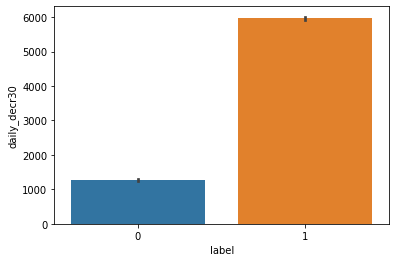

In [17]:
sns.barplot(df['label'],df['daily_decr30'])
# daily_decr30 is highly correlated with output level (High Daily amount spent from main account is mostly paid loan)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


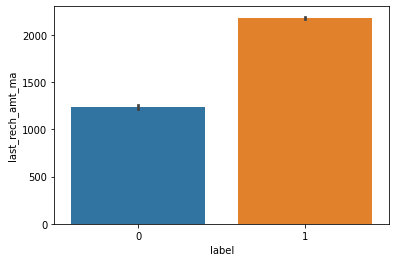

In [18]:
sns.barplot(df['label'],df['last_rech_amt_ma'])
# last_rech_amt_ma is highly correlated with output level (High Amount of last recharge of main account is mostly paid loan)

In [19]:
from scipy.stats import zscore
print("shape before removing the outliers :",df.shape)
z_scr=zscore(df)
df_new=df.loc[(abs(z_scr)<3).all(axis=1)]
print("shape after removing the outliers :",df_new.shape)
#We can't remove outliers beacuse large outliers are present.

shape before removing the outliers : (209593, 36)
shape after removing the outliers : (0, 36)


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


In [20]:
# Let's seprate dependent and independent variables.
df_x=df.drop(['label'],axis=1)
y=df[['label']]
print(df_x.shape)
print(y.shape)

(209593, 35)
(209593, 1)


In [21]:
#Lets treat above skewness
import numpy as np
for index in df_x.skew().index:
    if df_x.skew().loc[index]>0.5:
        df_x[index]=np.cbrt(df_x[index])
    if df_x.skew().loc[index]<-0.5:
        df_x[index]=np.cbrt(df_x[index])

In [22]:
len(df_x.skew().loc[(df_x.skew()>0.5) | (df_x.skew()<-0.5)])

23

In [23]:
df_x.skew()

aon                      8.740118
daily_decr30             0.538116
daily_decr90             0.607607
rental30                 0.084165
rental90                 0.173289
last_rech_date_ma       13.755535
last_rech_date_da       14.001042
last_rech_amt_ma        -0.401954
cnt_ma_rech30           -1.894286
fr_ma_rech30            13.695845
sumamnt_ma_rech30       -0.213060
medianamnt_ma_rech30    -1.944025
medianmarechprebal30    11.578252
cnt_ma_rech90           -0.338958
fr_ma_rech90             0.362360
sumamnt_ma_rech90       -0.016530
medianamnt_ma_rech90    -2.348905
medianmarechprebal90     0.509085
cnt_da_rech30           14.792314
fr_da_rech30            14.127590
cnt_da_rech90            6.670255
fr_da_rech90            17.539627
cnt_loans30              0.269101
amnt_loans30             0.345374
maxamnt_loans30         14.597061
medianamnt_loans30       3.558178
cnt_loans90             10.411644
amnt_loans90             0.747726
maxamnt_loans90         -8.933486
medianamnt_loa

In [24]:
# Due to high skewness need to apply SMOTE
from imblearn.over_sampling import SMOTE
df_x, y = SMOTE().fit_resample(df_x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

In [25]:
#Lets do the preprocessing bring features to common scale
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_x)
x=sc.transform(df_x)

In [26]:
x

array([[-0.24296188,  0.56141511,  0.51982612, ...,  0.70125283,
         0.50606895,  0.        ],
       [ 0.03344898,  1.53707234,  1.45727144, ..., -0.53428881,
         2.00960931,  0.        ],
       [-0.05808933,  0.17760394,  0.14865294, ...,  0.57769867,
         2.00960931,  0.        ],
       ...,
       [-0.18615974, -1.11336373, -1.09384401, ..., -1.64627629,
        -0.99747141,  0.        ],
       [ 0.06040177, -0.80469952, -0.79676891, ...,  1.81547406,
        -0.99747141,  0.        ],
       [-0.01230316, -0.79154675, -0.78410998, ..., -0.04007215,
        -0.99747141,  0.        ]])

In [27]:
#since it is imbalanced dataset so we will focus on auc-roc score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
def max_aucroc_score(clf,df_x,y):
    max_aucroc_score=0
    for r_state in range(42,60):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20,stratify=y)
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        aucroc_scr=roc_auc_score(y_test,y_pred)
        print("auc roc score corresponding to ",r_state," is ",aucroc_scr)
        if aucroc_scr>max_aucroc_score:
            max_aucroc_score=aucroc_scr
            final_r_state=r_state
    print("max auc roc score corresponding to ",final_r_state," is ",max_aucroc_score)
    return final_r_state

In [28]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
max_aucroc_score(dc,df_x,y)

auc roc score corresponding to  42  is  0.9206791734509596
auc roc score corresponding to  43  is  0.9206519247552433
auc roc score corresponding to  44  is  0.9225327155646703
auc roc score corresponding to  45  is  0.922382979991812
auc roc score corresponding to  46  is  0.921197250850454
auc roc score corresponding to  47  is  0.9211836395050548
auc roc score corresponding to  48  is  0.9211289374177702
auc roc score corresponding to  49  is  0.9190709420409661
auc roc score corresponding to  50  is  0.9203112072096342
auc roc score corresponding to  51  is  0.9214151505134691
auc roc score corresponding to  52  is  0.9212790143980477
auc roc score corresponding to  53  is  0.9208565414778191
auc roc score corresponding to  54  is  0.9213608106375376
auc roc score corresponding to  55  is  0.9218242353590914
auc roc score corresponding to  56  is  0.9200115038771527
auc roc score corresponding to  57  is  0.9223693262955467
auc roc score corresponding to  58  is  0.9207066521044477

44

In [29]:
from sklearn.model_selection import cross_val_score
print("Mean roc auc score for decision tree classifier: ",cross_val_score(dc,df_x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in roc auc score for decision tree classifier: ",cross_val_score(dc,df_x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(dc,df_x,y,cv=5,scoring="roc_auc"))

Mean roc auc score for decision tree classifier:  0.9167169357004911
standard deviation in roc auc score for decision tree classifier:  0.04241057211814412
[0.83323548 0.93935099 0.93816317 0.93708647 0.93748126]


In [30]:
#lets make our final model
x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = 44,test_size=0.20,stratify=y)
dc=DecisionTreeClassifier()
dc.fit(x_train,y_train)
y_pred=dc.predict(x_test)

In [31]:
#Lets print auc roc score and confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("f1 score is : ",f1_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print("AUC ROC Score: ",roc_auc_score(y_test,y_pred))

Confusion matrix 
 [[34041  2645]
 [ 3035 33652]]
f1 score is :  0.9221747232270086
classification report 
               precision    recall  f1-score   support

           0       0.92      0.93      0.92     36686
           1       0.93      0.92      0.92     36687

    accuracy                           0.92     73373
   macro avg       0.92      0.92      0.92     73373
weighted avg       0.92      0.92      0.92     73373

AUC ROC Score:  0.92258740019151


In [ ]:
#Lets use Gradient boosting classifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
gb_clf=GradientBoostingClassifier()
clf = GridSearchCV(gb_clf, parameters, cv=3,scoring="roc_auc")
clf.fit(df_x,y)
clf.best_params_

In [ ]:
gb_clf=GradientBoostingClassifier(learning_rate=0.1,n_estimators=100)
max_aucroc_score(gb_clf,df_x,y)

In [ ]:
#Lets use KNN
#For KNN we need to know the best value of k using grid search
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
kc=KNeighborsClassifier()
neighbors={"n_neighbors":range(1,30)}
clf = GridSearchCV(kc, neighbors, cv=3,scoring="roc_auc")
clf.fit(df_x,y)
clf.best_params_

In [ ]:
kc=KNeighborsClassifier(n_neighbors=29)
max_aucroc_score(kc,x,y)

In [ ]:
from sklearn.model_selection import cross_val_score
print("Mean roc auc score for  KNN classifier: ",cross_val_score(kc,x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in roc auc score for KNN classifier: ",cross_val_score(kc,x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(kc,x,y,cv=5,scoring="roc_auc"))

In [ ]:
#Lets use SVM
from sklearn.svm import SVC
svc=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svc, parameters, cv=5,scoring="roc_auc")
clf.fit(df_x,y)
clf.best_params_

In [ ]:
svc=SVC(kernel="linear",C=0.1)
max_aucroc_score(svc,x,y)

In [ ]:
print("Mean roc auc score for SVM classifier: ",cross_val_score(svc,x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in roc auc score for SVM classifier: ",cross_val_score(svc,x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(svc,x,y,cv=5,scoring="roc_auc"))